In [1]:
import numpy as np
import os
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import shapely.geometry as sgeom
import sklearn
from sklearn.linear_model import LinearRegression
#import sklearn.gaussian_process as gp
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import scipy as sp

In [2]:
storms_array = np.load('../branchruns3/storms_array_new.npy')

In [3]:
storms_array.shape

(729, 13, 2)

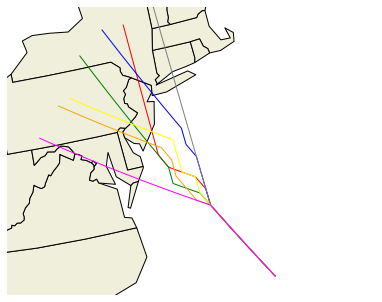

In [7]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal(),frameon=False)
ax.patch.set_visible(False)
ax.set_extent([-80, -66.5, 35, 42], ccrs.Geodetic())
shapename = 'admin_1_states_provinces_lakes'
states_shp = shpreader.natural_earth(resolution='110m',
                        category='cultural', name=shapename)
def colorize_state(geometry):
    facecolor = (0.9375, 0.9375, 0.859375)
    return {'facecolor': facecolor, 'edgecolor': 'black'}
ax.add_geometries(
    shpreader.Reader(states_shp).geometries(),
    ccrs.PlateCarree(),
    styler=colorize_state)


colorspair = ['red','green','blue','orange','yellow','grey','magenta']
#for i, j in enumerate(np.random.randint(len(track_subset), size = 10)):
#range(47,69)
#ike = np.genfromtxt('../ike/ike.storm', skip_header = 3)
#ids = np.random.randint(len(storms_array), size = 5)
for j, i in enumerate(ids_new):
    
    f0 = sp.interpolate.interp1d(range(13),storms_array[i,:,0],fill_value="extrapolate")
    f1 = sp.interpolate.interp1d(range(13),storms_array[i,:,1],fill_value="extrapolate")
    lons = f0(range(20))
    lats = f1(range(20))
    #lons = storms_array[i,:,0]
    #lats = storms_array[i,:,1]
    track = sgeom.LineString(zip(lons, lats))
    ax.add_geometries([track], ccrs.PlateCarree(),
                          facecolor='none',edgecolor = colorspair[j])

    #ax.scatter(lons,lats,transform=ccrs.PlateCarree(), color = colorspair[j], zorder = 3)
plt.savefig('plotdatasetnew2.svg', dpi='figure', format='svg')
plt.show()

In [31]:
#print(ids)

[156 463  10 599 299]


In [32]:
print(ids)

[156 463  10 599 299]


In [6]:
ids_new = [156, 463,  10, 599, 299]+[0,len(storms_array)-1]

In [38]:
ids_new = list(ids) + [0,len(storms_array)-1]

These synthetic tracks are based on perturbations of hurricane sandy. 